# Exploratory data analysis

## Descriptive statistics

The following code performs a descriptive statistics on the data about the financial news. The analysis includes obtaining basic statistics for textual lengths(The length of the headline), identifying the most active publisher by counting the number of publications and an analysis of publication dates to show trends over time.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'raw_analyst_ratings.csv' with the actual filename)
df = pd.read_csv('raw_analyst_ratings.csv')

# Convert the 'date' column to datetime format, handling different formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Descriptive Statistics for Headline Length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()
print("Basic Statistics for Headline Length:\n", headline_stats)



Basic Statistics for Headline Length:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [8]:
# Count the number of articles per publisher
publisher_count = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:\n", publisher_count)


Number of Articles per Publisher:
 publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


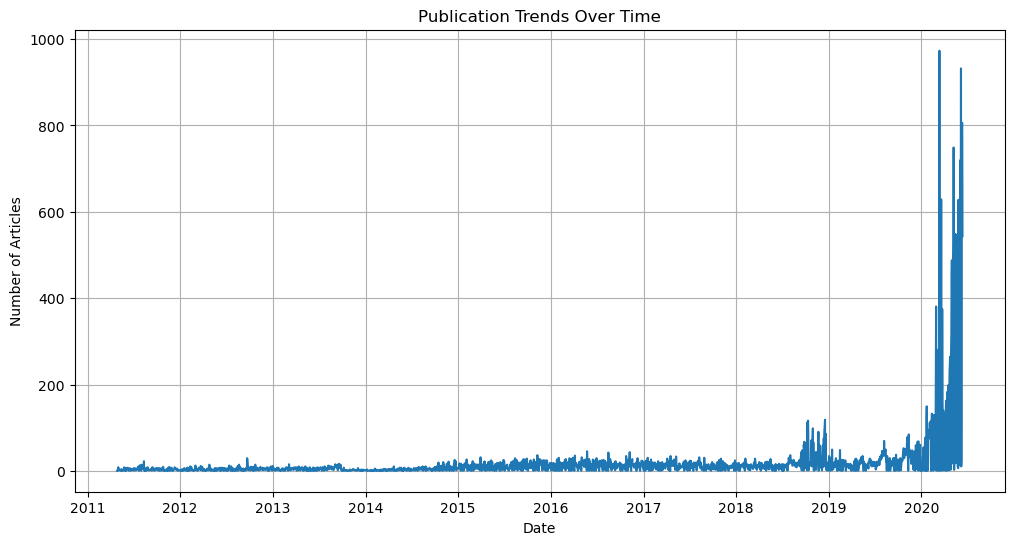


Publication Frequency by Day of the Week:
 day_of_week
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


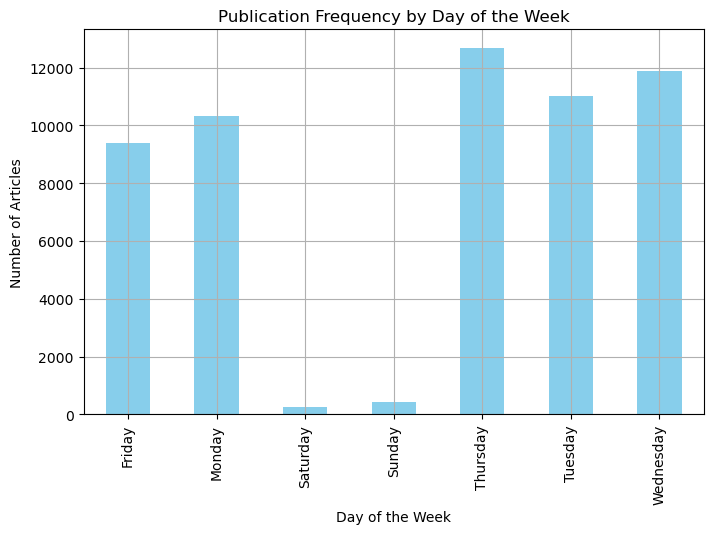

In [9]:
# Analyze publication trends over time
df['Date_only'] = df['date'].dt.date
publication_trends = df['Date_only'].value_counts().sort_index()

# Plotting publication trends over time
plt.figure(figsize=(12, 6))
publication_trends.plot()
plt.title("Publication Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

# Analyze publication frequency by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_count = df['day_of_week'].value_counts().sort_index()
print("\nPublication Frequency by Day of the Week:\n", day_of_week_count)

# Plotting publication frequency by day of the week
plt.figure(figsize=(8, 5))
day_of_week_count.plot(kind='bar', color='skyblue')
plt.title("Publication Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


## Text Analysis(Sentiment analysis & Topic modeling)

In this section a sentiment analysis is conducted in order to categorize the headlines using three basic sentiments(Positive, Negative and neutral). Also natural language processing(NLP) is going to be used to identify common key words or phrases like FDA approval, price target,Dividend,Stock Split,Debt Offering,IPO (Initial Public Offering),Regulatory,Clearance,Patent Approval,Sell-off,Sales Growth,Product Launch,Expansion Plans,Partnership/Collaboration,Strategic Investment,Consumer,Confidence,GDP Growth,Interest Rate,Economic Slowdown,Leadership Change and New Market Entry.

In [16]:
import os
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a list of common keywords/phrases for topic modeling
keywords = [
    "FDA approval", "price target", "Dividend", "Stock Split", "Debt Offering",
    "IPO (Initial Public Offering)", "Regulatory Clearance", "Patent Approval",
    "Sell-off", "Sales Growth", "Product Launch", "Expansion Plans",
    "Partnership/Collaboration", "Strategic Investment", "Consumer Confidence",
    "GDP Growth", "Interest Rate", "Economic Slowdown", "Economic Boom",
    "Leadership Change", "New Market Entry"
]

def analyze_sentiment(headline):
    """Analyze sentiment of a single headline."""
    score = sia.polarity_scores(headline)
    if score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment

def extract_keywords(headline):
    """Extract keywords/phrases from a headline."""
    extracted_keywords = [keyword for keyword in keywords if keyword.lower() in headline.lower()]
    return extracted_keywords

def main():
    # Example headlines for analysis
    headlines = [
        "Company XYZ announces FDA approval for new drug.",
        "Stock Split planned for next quarter.",
        "Sales Growth reported in Q2 earnings.",
        "New Market Entry strategy for Asian market unveiled.",
        "Economic Slowdown expected due to global events."
    ]
    
    # DataFrame to store results
    df = pd.DataFrame(headlines, columns=['Headline'])
    df['Sentiment'] = df['Headline'].apply(analyze_sentiment)
    df['Keywords'] = df['Headline'].apply(extract_keywords)
    
    # Print results
    print(df)

if __name__ == "__main__":
    main()


                                            Headline Sentiment  \
0   Company XYZ announces FDA approval for new drug.  Positive   
1              Stock Split planned for next quarter.   Neutral   
2              Sales Growth reported in Q2 earnings.  Positive   
3  New Market Entry strategy for Asian market unv...   Neutral   
4   Economic Slowdown expected due to global events.   Neutral   

              Keywords  
0       [FDA approval]  
1        [Stock Split]  
2       [Sales Growth]  
3   [New Market Entry]  
4  [Economic Slowdown]  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Beab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Beab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Time series analysis

The following block conducts a time series analysis which shows trends, frequency of publications related to specific market events and an analysis of specific times where the most news were released.


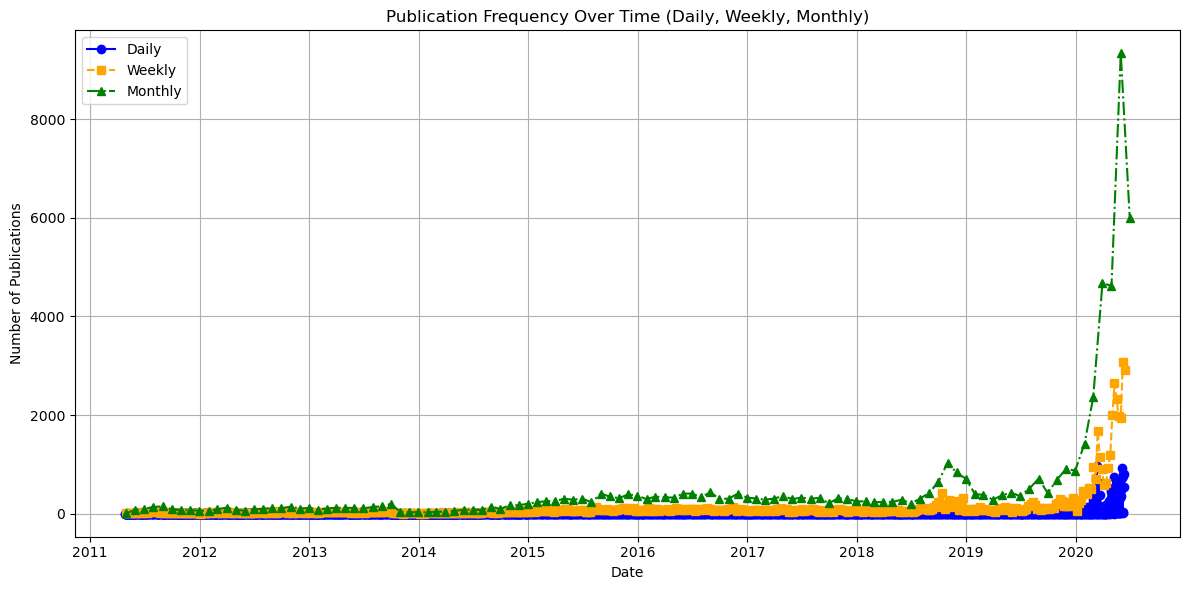

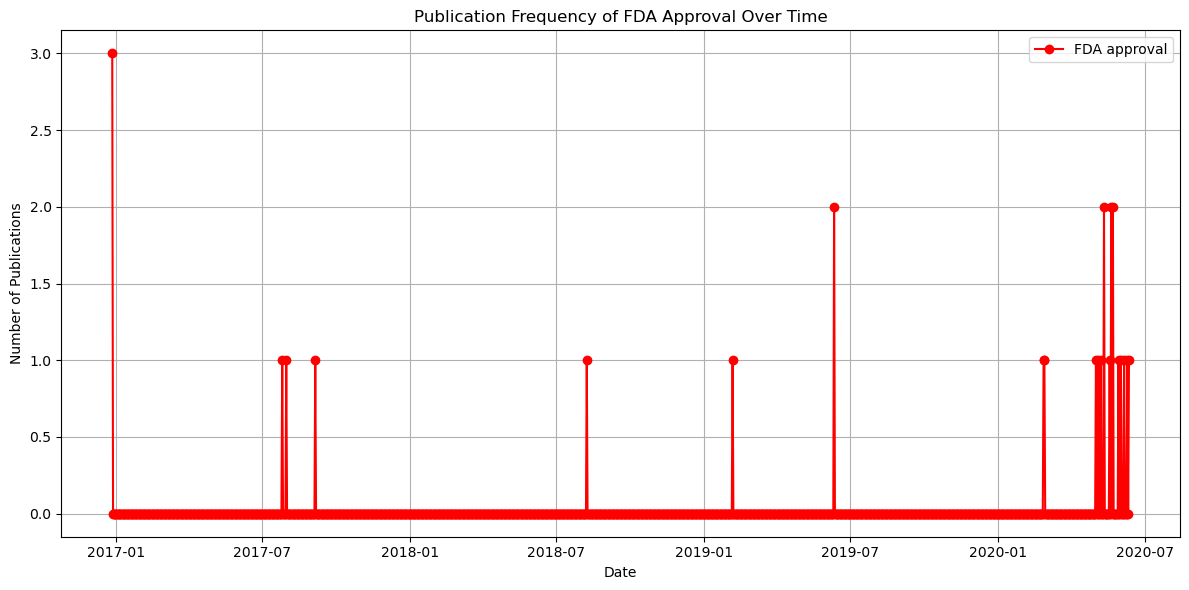

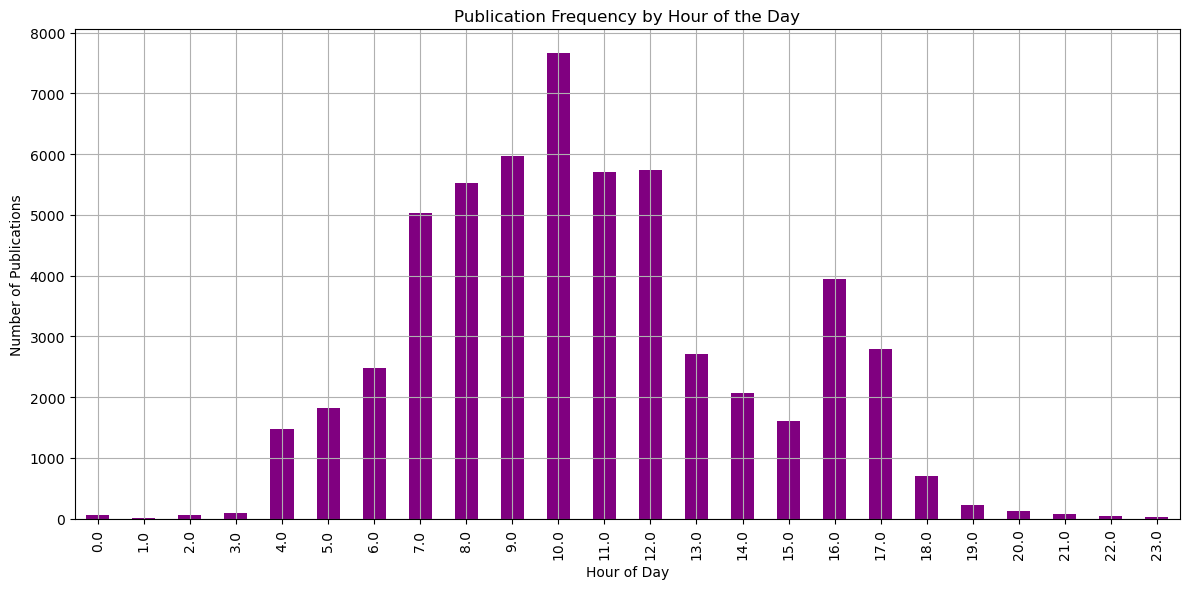

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'raw_analyst_ratings.csv' with the actual filename)
df = pd.read_csv('raw_analyst_ratings.csv')

# Convert the 'date' column to datetime format, handling different formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the 'date' column as the index for time-based analysis
df.set_index('date', inplace=True)

# 1. Analyze publication frequency over time (daily, weekly, and monthly trends)

# Daily publication counts
daily_counts = df.resample('D').size()

# Weekly publication counts
weekly_counts = df.resample('W').size()

# Monthly publication counts
monthly_counts = df.resample('M').size()



# 2. Detect spikes in article publications related to specific market events
# You can group the data by headline or keywords (e.g., 'FDA approval', 'price target', etc.)

# Example: Analyze publication spikes related to the term 'FDA approval'
event_spikes = df[df['headline'].str.contains('FDA approval', case=False)]

# Resample the event-related data to daily counts
event_daily_counts = event_spikes.resample('D').size()

# 3. Analyze the time of day when most news is released
# Extract the hour from the 'date' column
df['hour'] = df.index.hour

# Count the number of publications per hour
hourly_counts = df.groupby('hour').size()



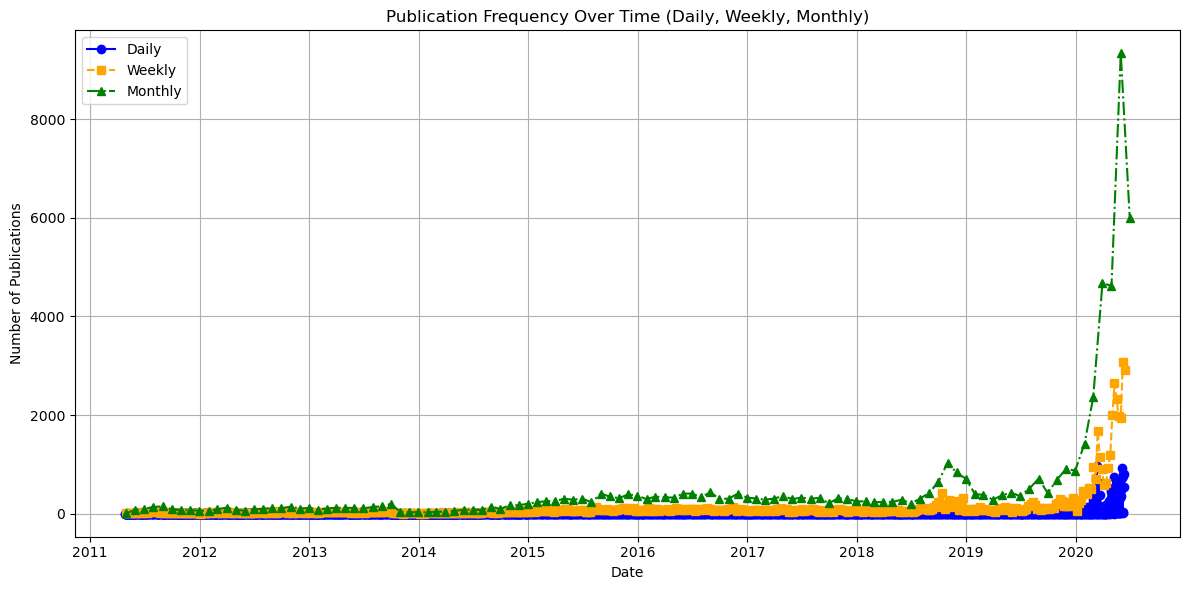

In [44]:
# Plot publication frequency over time (daily, weekly, and monthly)
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Daily', marker='o', linestyle='-', color='b')
plt.plot(weekly_counts.index, weekly_counts.values, label='Weekly', marker='s', linestyle='--', color='orange')
plt.plot(monthly_counts.index, monthly_counts.values, label='Monthly', marker='^', linestyle='-.', color='green')
plt.title('Publication Frequency Over Time (Daily, Weekly, Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

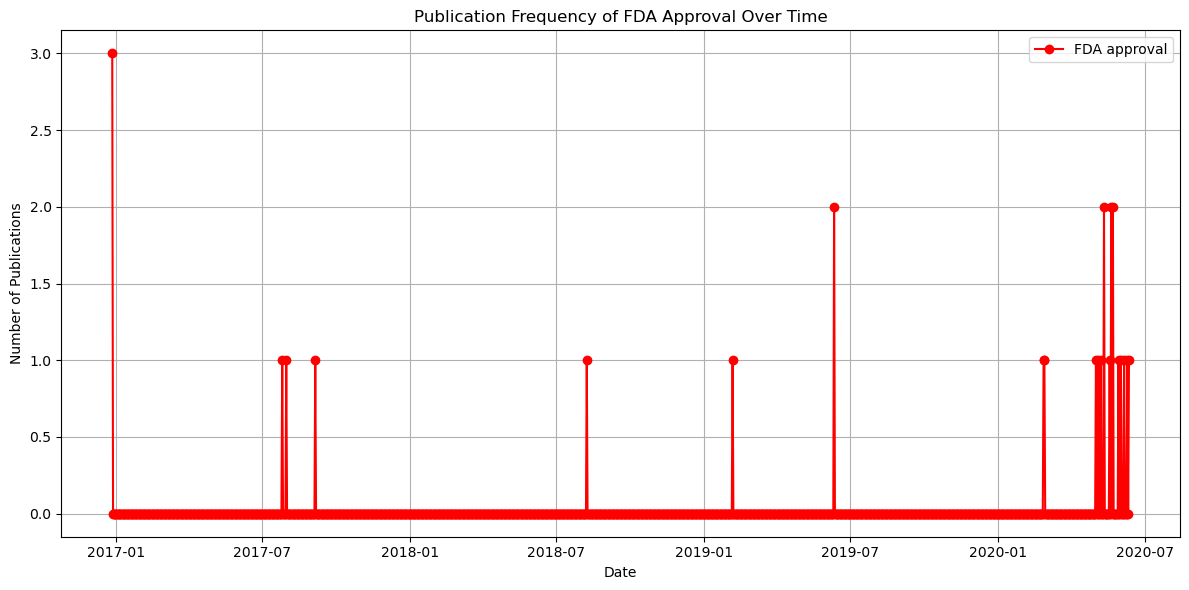

In [45]:
# Plot the event publication spikes
plt.figure(figsize=(12, 6))
plt.plot(event_daily_counts.index, event_daily_counts.values, label='FDA approval', marker='o', linestyle='-', color='red')
plt.title('Publication Frequency of FDA Approval Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

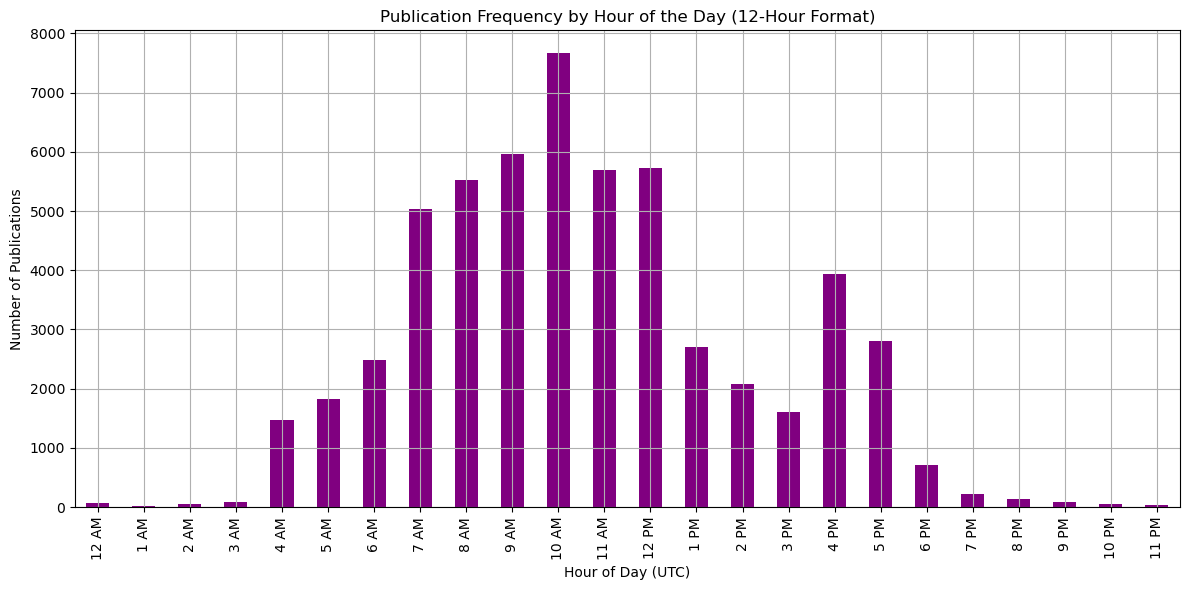

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `hourly_counts` is already calculated
# Example: 
# hourly_counts = df.groupby('hour').size()

# Map to 12-hour format with AM/PM
hour_labels = {
    0: '12 AM', 1: '1 AM', 2: '2 AM', 3: '3 AM', 4: '4 AM', 5: '5 AM',
    6: '6 AM', 7: '7 AM', 8: '8 AM', 9: '9 AM', 10: '10 AM', 11: '11 AM',
    12: '12 PM', 13: '1 PM', 14: '2 PM', 15: '3 PM', 16: '4 PM', 17: '5 PM',
    18: '6 PM', 19: '7 PM', 20: '8 PM', 21: '9 PM', 22: '10 PM', 23: '11 PM'
}

# Convert the index to 12-hour format with AM/PM
hourly_counts.index = hourly_counts.index.map(hour_labels)

# Plot the publication frequency by hour in 12-hour format
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='purple')
plt.title('Publication Frequency by Hour of the Day (12-Hour Format)')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.tight_layout()
plt.show()



## Publisher analysis

The following analysis tries to provide an overview about the publishers contribution to the news feed, identification of email adresses if they exist and the difference in the type of news reported.

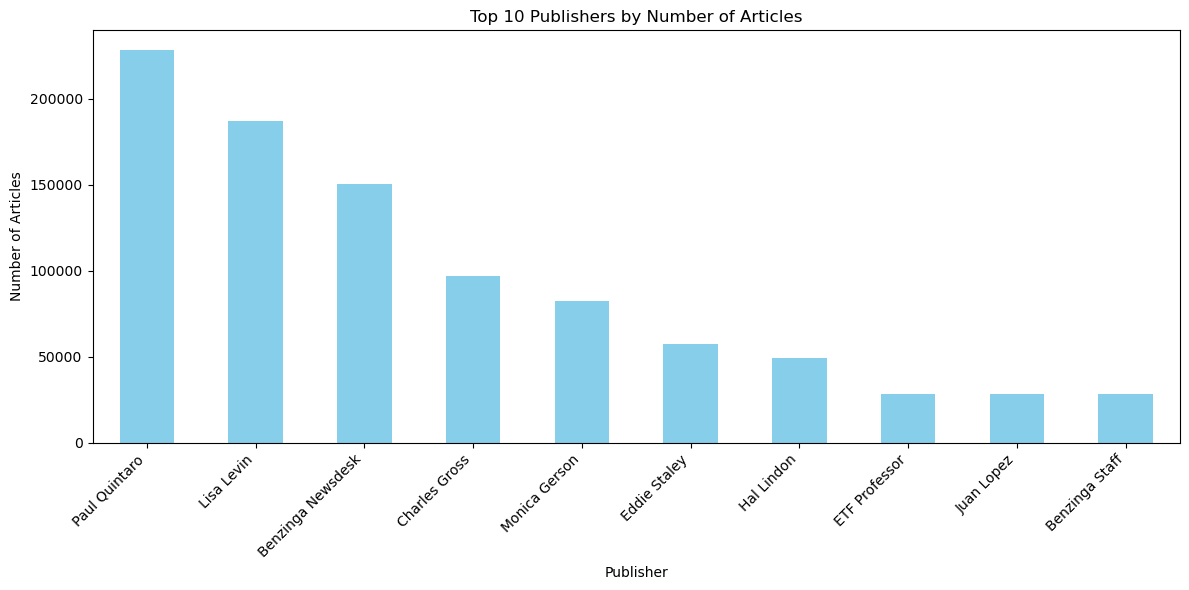

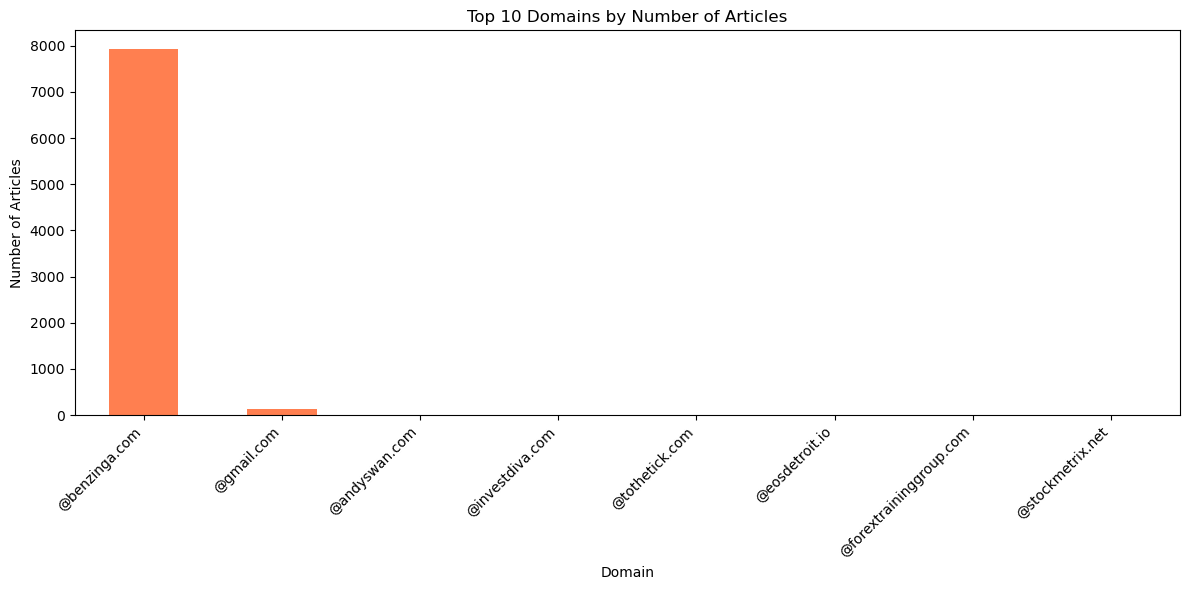

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the dataset (replace 'raw_analyst_ratings.csv' with the actual filename)
df = pd.read_csv('raw_analyst_ratings.csv')

# 1. Publisher Contribution Analysis
# Count the number of articles contributed by each publisher
publisher_counts = df['publisher'].value_counts()

# Plot the top 10 publishers by number of articles
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

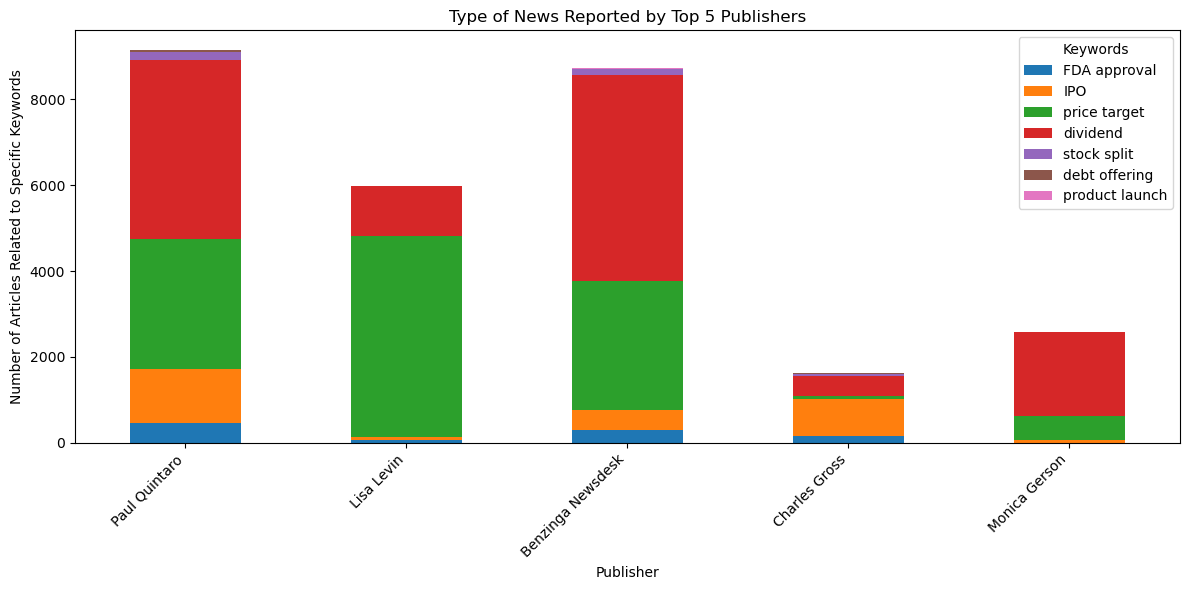

In [50]:
# 2. News Type Analysis
# Example: Group by 'Publisher' and analyze the number of articles related to specific keywords (e.g., 'FDA approval', 'IPO', etc.)
keywords = ['FDA approval', 'IPO', 'price target', 'dividend', 'stock split', 'debt offering', 'product launch']

# Create a new DataFrame to store counts of keyword occurrences by publisher
news_type_counts = pd.DataFrame(index=df['publisher'].unique(), columns=keywords).fillna(0)

# Count the occurrences of each keyword in the 'headline' column for each publisher
for keyword in keywords:
    news_type_counts[keyword] = df.groupby('publisher')['headline'].apply(lambda x: x.str.contains(keyword, case=False).sum())

# Plot the keyword occurrences for the top publishers (example: top 5)
top_publishers = publisher_counts.head(5).index
news_type_counts.loc[top_publishers].plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Type of News Reported by Top 5 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles Related to Specific Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Keywords')
plt.tight_layout()
plt.show()

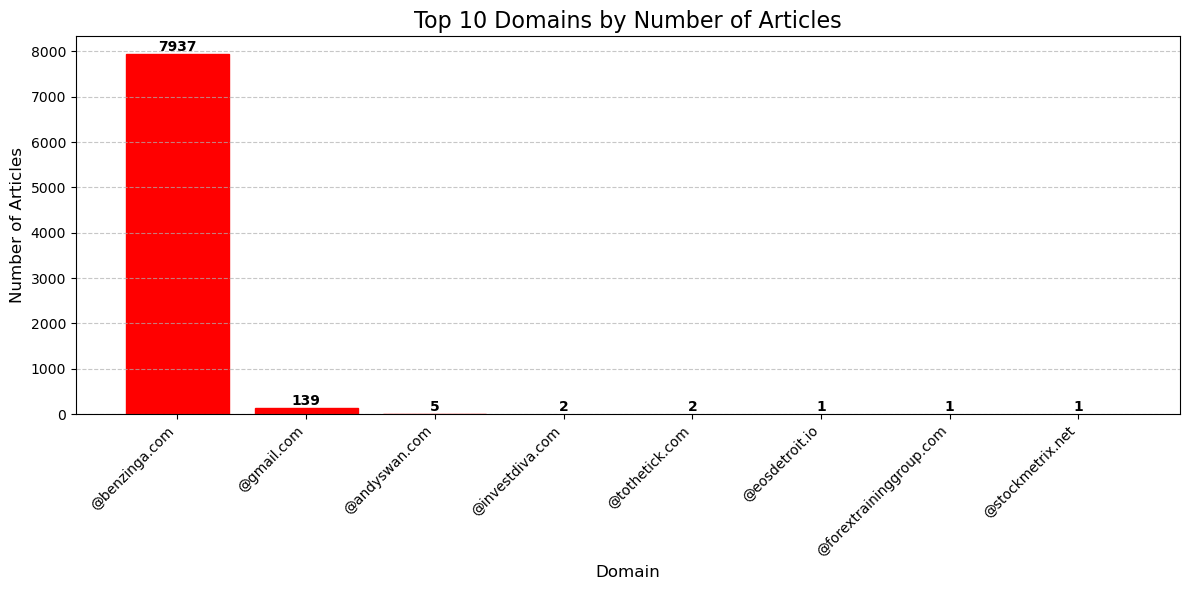

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the top 10 domains by number of articles
top_domains = domain_counts.head(10).sort_values(ascending=False)

# Custom color palette for bars
colors = sns.color_palette("husl", len(top_domains))

# Plot the top 10 domains by number of articles
plt.figure(figsize=(12, 6))
bars = plt.bar(top_domains.index, top_domains.values, color=colors)

# Add title and labels
plt.title('Top 10 Domains by Number of Articles', fontsize=16)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations (number of articles) above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Highlight top 3 contributors with a different color (optional)
highlight_color = 'red'
for i in range(3):
    bars[i].set_color(highlight_color)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
